Enter Affine cipher key 'a' (must be coprime with 26): 5
Enter Affine cipher key 'b': 8
Enter plain text: h
Affine Cipher Ciphertext: r

Hamming code input (binary): [0, 1, 1, 1, 0, 0, 1, 0]


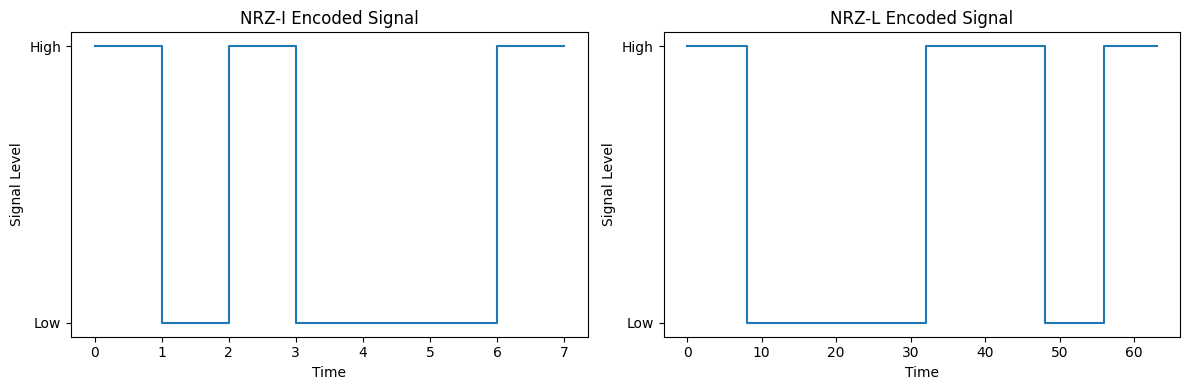


Hamming code: Sender side:   1 1 0 1 1 1 1 1 0 0 1 0 
Length = 12

-----------------------------------
Enter the modified code
1 1 0 1 1 1 1 1 0 0 1 1

Position of Error: 12
Hamming code: Receiver side: Error Corrected:  1 1 0 1 1 1 1 1 0 0 1 0 
-----------------------------------
Original bits sent by the Sender =  [0, 1, 1, 1, 0, 0, 1, 0] = r
Affine Cipher Decrypted Plaintext: h


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Affine Cipher Encryption
a = int(input("Enter Affine cipher key 'a' (must be coprime with 26): "))
b = int(input("Enter Affine cipher key 'b': "))
plaintext = input("Enter plain text: ")

ciphertext = ""
for char in plaintext:
    if char.isalpha():
        char_ascii = ord(char)
        if char.isupper():
            ciphertext += chr((a * (char_ascii - 65) + b) % 26 + 65)
        else:
            ciphertext += chr((a * (char_ascii - 97) + b) % 26 + 97)
    else:
        ciphertext += char

cipher = ciphertext
print("Affine Cipher Ciphertext:", ciphertext)

# Convert Text to Binary
binary_ciphertext_original = ''.join(format(ord(char), '08b') for char in ciphertext)
binary_ciphertext = list(map(int, binary_ciphertext_original))
print("\nHamming code input (binary):", binary_ciphertext)

# NRZ-I Encoding
nrz_i_signal = []
current_state = 1
for bit in binary_ciphertext:
    if bit == 1:
        current_state = -current_state
    nrz_i_signal.append(current_state)

# NRZ-L Encoding
nrz_l_signal = []
for bit in binary_ciphertext:
    if bit == 1:
        nrz_l_signal.extend([-1] * len(binary_ciphertext))
    else:
        nrz_l_signal.extend([1] * len(binary_ciphertext))

# Plot Signals
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].step(range(len(nrz_i_signal)), nrz_i_signal, where='post')
axs[0].set_title('NRZ-I Encoded Signal')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Signal Level')
axs[0].set_yticks([-1, 1], ['Low', 'High'])

axs[1].step(range(len(nrz_l_signal)), nrz_l_signal, where='post')
axs[1].set_title('NRZ-L Encoded Signal')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Signal Level')
axs[1].set_yticks([-1, 1], ['Low', 'High'])

plt.tight_layout()
plt.show()

# Hamming Code Encoding
maxp = 5
temp = []
j = 0

for i in range(len(binary_ciphertext)):
    for k in range(maxp):
        t = 2**k - 1
        if j == t:
            temp.append(0)
            j += 1

    temp.append(binary_ciphertext[i])
    j += 1

nh = j
n = nh - len(binary_ciphertext)
b = [0] * n
m = n - 1

for k in range(n):
    t = 2**k - 1
    i = t
    while i < nh:
        for j in range(t + 1):
            b[k] += temp[i]
            i += 1
            if i >= nh:
                break

        if i >= nh:
            break

        for j in range(t + 1):
            i += 1
            if i >= nh:
                break

        if i >= nh:
            break

    temp[t] = b[k] % 2

encoded_data = temp

print("\nHamming code: Sender side:   ", end="")
for i in range(len(encoded_data)):
    print("{} ".format(encoded_data[i]), end="")
print("\nLength =", len(encoded_data))
print("\n-----------------------------------")

# Hamming Code Decoding
print("Enter the modified code")
temp2 = list(map(int, input().split()))

sum_val = 0
b = [0] * n
m = n - 1
pos = 0

for k in range(n):
    t = 2**k - 1
    i = t
    while i < nh:
        for j in range(t + 1):
            sum_val += temp2[i]
            i += 1
            if i >= nh:
                break

        if i >= nh:
            break

        for j in range(t + 1):
            i += 1
            if i >= nh:
                break

        if i >= nh:
            break

    b[m] = sum_val % 2
    sum_val = 0
    m -= 1

for m in range(n):
    pos += b[n - m - 1] * 2**m

print("\nPosition of Error: {}".format(pos))

if temp2[pos - 1] == 0:
    temp2[pos - 1] = 1
else:
    temp2[pos - 1] = 0

print("Hamming code: Receiver side: Error Corrected:  ", end="")
for i in range(nh):
    print("{} ".format(temp2[i]), end="")

print("\n-----------------------------------")

# Affine Cipher Decryption
a_inv = 0
for i in range(26):
    if (a * i) % 26 == 1:
        a_inv = i
        break

original_plaintext = ""
for char in cipher:
    if char.isalpha():
        char_ascii = ord(char)
        if char.isupper():
            original_plaintext += chr((a_inv * (char_ascii - 65 - b)) % 26 + 65)
#        else:
#            original_plaintext += chr((a_inv * (char_ascii - 97 - b)) % 26 + 97)
    else:
        original_plaintext += char

#print("\n-----------------------------------")
print("Original bits sent by the Sender = ",binary_ciphertext, "=",ciphertext)
print("Affine Cipher Decrypted Plaintext:",plaintext)

